
## PODER ENCUESTAS COL2018 


**Encuestas a la fecha: 27**

Objetivo: Un intento de estimar el poder estadístico de las encuestas de intención de voto en R.

Índice:

1. Paquetes
2. Alistamiento
3. Cálculos de poder
4. Gráficas

In [4]:
# Paquetes

rm(list = ls())      #Limpiar ambiente en R
library(devtools)    #Instalar paquete de desarrollo antes de comenzar
install_github("espanta/lubripack")     #Instalar lubripack para instalar y cargar varios paquetes a la vez
lubripack::lubripack("pwr","clusterPower","sampling","tidyverse","RCurl")    #paquetes

# Alistar
options(encoding = "UTF-8")

# Cargar encuesta
encuestas <- read.csv(text=getURL("https://raw.githubusercontent.com/nelsonamayad/Elecciones-presidenciales-2018/master/Elecciones%202018/encuestas2018.csv"), header=T)

Skipping install of 'lubripack' from a github remote, the SHA1 (b1dd9ee1) has not changed since last install.
  Use `force = TRUE` to force installation



Bellow Packages Successfully Installed:

         pwr clusterPower     sampling    tidyverse        RCurl 
        TRUE         TRUE         TRUE         TRUE         TRUE 


### PODER
Ya que algunas fichas técnicas de las encuestas reportan márgenes de error para cierto tipo de pruebas (e.g. "el margen de error para una confianza del $\text{Y}\,\%$ es  $\text{X}\,\%$ para proporciones mayores a  $\text{Z}\,\%$), se interpretan esos márgenes para calcular el poder post hoc de cada encuesta utilizando la muestra efectiva, el tipo de prueba (i.e. diferencias en proporciones), el nivel de significancia (casi siempre $95\,\%$) y dejando que varíe el tamaño del efecto (de $1\,\%$ a $5\,\%$ de diferencia).

### Limitaciones:

1. No se incluyen clusters, así que la correlación inter-cluster se asume cero y eso infla el poder.
2. Para las encuestas que no mencionan el tipo de prueba se asume una prueba de diferencia de proporciones mayor a $50\,\%$.

Cálculos de poder para proporciones $p: H_0: p = X, H_1: p > X + e$. Test de una sola cola (mayor a alpha) Poder para una proporcion mayor a cierto nivel con `pwr.p.test`: $h\, (H_1, H_0)$, $n$ (muestra), `sig.level` (alpha), una sola cola.

In [5]:
cons.1 <- 0.5      #Encuestas #: 3-4, 6-9, 16. Default para encuestas #: 1, 10, 12, 14, 18, 21, 22, 24,25
cons.2 <- 0.2      #Encuestas #: 2, 5, 13, 17, 19, 23
cons.3 <- 0.25     #Encuestas #: 11
cons.4 <- 0.14     #Encuestas #: 15, 20
cons.5 <- 0.24     #Encuestas: 27
eff.1 <- 0.01      #Efecto a detectar 1%
eff.2 <- 0.02      #Efecto a detectar 2%
eff.5 <- 0.05      #Efecto a detectar 2%
a = 0.05           #Nivel de confianza 95%

In [6]:
# Efecto 1%:

# Encuestas con proporción mayor a 50%:
pow.3 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[3])
pow.4 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[4])
pow.6 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[6])
pow.7 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[7])
pow.8 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[8])
pow.9 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[9])
pow.16 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[16])

# Encuestas con proporción mayor a 20%:
pow.2 <- pwr.p.test(h = ES.h(eff.1+cons.2, cons.2), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[2])
pow.5 <- pwr.p.test(h = ES.h(eff.1+cons.2, cons.2), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[5])
pow.13 <- pwr.p.test(h = ES.h(eff.1+cons.2, cons.2), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[13])
pow.17 <- pwr.p.test(h = ES.h(eff.1+cons.2, cons.2), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[17])
pow.19 <- pwr.p.test(h = ES.h(eff.1+cons.2, cons.2), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[19])
pow.23 <- pwr.p.test(h = ES.h(eff.1+cons.2, cons.2), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[23])

# Encuestas con proporción mayor a 25%:
pow.11 <- pwr.p.test(h = ES.h(eff.1+cons.3, cons.3), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[11])

# Encuestas con proporción mayor a 24%:
pow.27 <- pwr.p.test(h = ES.h(eff.1+cons.5, cons.5), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[27])

# Encuestas con proporción mayor a 14%:
pow.15 <- pwr.p.test(h = ES.h(eff.1+cons.4, cons.4), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[15])
pow.20 <- pwr.p.test(h = ES.h(eff.1+cons.4, cons.4), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[20])

# Default para las que no especifican: proporción mayor a 50%:
pow.1 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[1])
pow.10 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[10])
pow.12 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[12])
pow.14 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[14])
pow.18 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[18])
pow.21 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[21])
pow.22 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[22])
pow.24 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[24])
pow.25 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[25])

# Tribble con los resultados
d.eff.1 <- tribble(~n, ~power1, 
                   1, pow.1[[4]],
                   2, pow.2[[4]],
                   3, pow.3[[4]],
                   4, pow.4[[4]],
                   5, pow.5[[4]],
                   6, pow.6[[4]],
                   7, pow.7[[4]],
                   8, pow.8[[4]],
                   9, pow.9[[4]],
                   10, pow.2[[4]],
                   11, pow.11[[4]],
                   12, pow.2[[4]],
                   13, pow.13[[4]],
                   14, pow.13[[4]],
                   15, pow.15[[4]],
                   16, pow.16[[4]],
                   17, pow.17[[4]],
                   18, pow.13[[4]],
                   19, pow.19[[4]],
                   20, pow.20[[4]],
                   21, pow.13[[4]],
                   22, pow.13[[4]],
                   23, pow.23[[4]],
                   24, pow.24[[4]],
                   25, pow.25[[4]],
#                   26, pow.26[[4]]
                   27, pow.27[[4]]
)
## Se puede repetir con un loop para otros tamaños de efectos

### GRÁFICA

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 5 rows containing missing values (geom_point).”

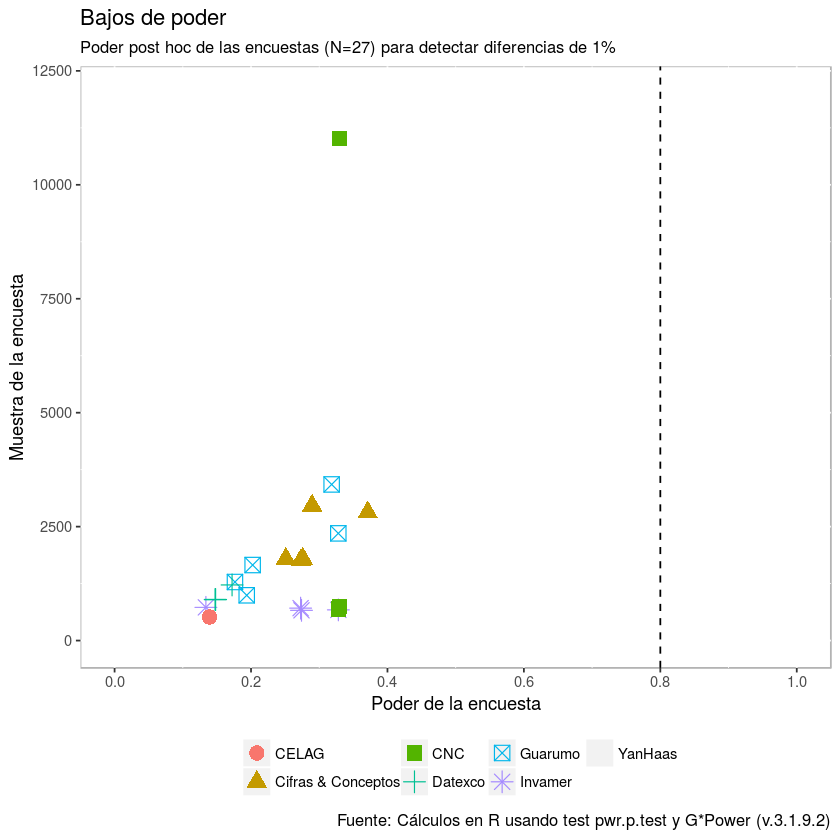

In [7]:
#Pegar calculos de poder a los datos de las encuestas
pow <- left_join(select(encuestas, n, fecha, encuestadora, muestra_int_voto), d.eff.1, by = "n")

# Poder para detectar una diferencia de 1%:
ggplot(data=filter(pow), aes(x=power1, y=muestra_int_voto))+
  geom_jitter(aes(shape=encuestadora, color=encuestadora), size=4) +               #Datos 1%
  geom_vline(xintercept=0.8, linetype="dashed") +                                  #linea de 80% de poder
  theme(legend.position="bottom", legend.title=element_blank(), panel.background=element_rect(fill="white", color="grey70")) +
  scale_y_continuous(limits=c(0,12000)) +
  scale_x_continuous(limits=c(0,1), breaks=c(0,0.2,0.4,0.6,0.8,1)) +
  labs(y="Muestra de la encuesta", 
       x="Poder de la encuesta", 
       title="Bajos de poder",
       subtitle="Poder post hoc de las encuestas (N=27) para detectar diferencias de 1%",
       caption="Fuente: Cálculos en R usando test pwr.p.test y G*Power (v.3.1.9.2)"
  ) 

### CONCLUSIÓN: 

Ninguna encuesta tienen poder suficiente para detectar diferencias de $1\,\%$ entre los candidatos. Eso es normal.

### EXTENSIÓN:

Si repite el análisis con $2\,\%$ en vez de $1\,\%$, solo Cifras & Conceptos y una encuesta telefonica del CNC tienen más de $80\,\%$ de poder para etectar ese efecto. Una de Guarumo está cerca con $\sim 77\,\%$.
